In [29]:
import pickle
import os
import pyblp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
# ディレクトリのパス
directory_path = "./results/"

# ディレクトリ内のファイルをリストとして取得
file_list = os.listdir(directory_path)

# ファイルリストを表示
for i,file in enumerate(file_list):
    print(i,file)

0 MNL_len3_2023-09-05_21-06-56.pkl
1 MNL_len3_2023-09-13_19-15-05.pkl
2 MNL_len4_2023-09-05_21-04-58.pkl
3 RCL_len3_2023-09-05_23-34-50.pkl
4 RCL_len3_2023-09-07_10-26-25.pkl
5 RCL_len3_2023-09-14_01-27-16.pkl
6 RCL_len3_2023-09-15_20-29-44.pkl
7 RCL_len4_2023-09-05_21-02-48.pkl


In [31]:
file_name=file_list[6]
with open(f"./results/{file_name}", "rb") as f:
    result = pickle.load(f)

In [32]:
# problem and rc_types
result.problem, result.problem.rc_types

(Dimensions:
  T     N      I     K1    K2    MD    ED 
 ---  -----  -----  ----  ----  ----  ----
 200  25798  40000   4     2     6     2  
 
 Formulations:
        Column Indices:            0        1          2          3   
 -----------------------------  -------  -------  -----------  -------
  X1: Linear Characteristics    prices    oral    in_hospital  generic
 X2: Nonlinear Characteristics  -prices  generic                      
 =====================================================================,
 ['log', 'linear'])

In [33]:
# constraints
result.sigma_bounds,result.pi_bounds

((array([[  0.,   0.],
         [  0., -inf]]),
  array([[inf,  0.],
         [ 0., inf]])),
 (array([], shape=(2, 0), dtype=float64),
  array([], shape=(2, 0), dtype=float64)))

In [34]:
# result
result

Problem Results Summary:
GMM     Objective      Projected    Reduced Hessian  Reduced Hessian  Clipped  Weighting Matrix  Covariance Matrix
Step      Value      Gradient Norm  Min Eigenvalue   Max Eigenvalue   Shares   Condition Number  Condition Number 
----  -------------  -------------  ---------------  ---------------  -------  ----------------  -----------------
 2    +5.133956E-01  +8.633399E-01   -2.678789E+07    +8.260620E+07      0      +3.757242E+08      +2.720855E+08  

Cumulative Statistics:
Computation  Optimizer  Optimization   Objective   Fixed Point  Contraction
   Time      Converged   Iterations   Evaluations  Iterations   Evaluations
-----------  ---------  ------------  -----------  -----------  -----------
 01:38:56       Yes          3            12         2811523      8438415  

Nonlinear Coefficient Estimates (Robust SEs in Parentheses):
Types:  |  Sigma:       -prices          generic    
------  |  -------  ---------------  ---------------
 Log    |  -prices 

In [35]:
# time in minutes
result.cumulative_total_time/60

98.9275143901507

In [36]:

product_data=pd.DataFrame(pyblp.data_to_dict(result.problem.products))

Computing elasticities with respect to prices ...
Finished after 00:00:00.



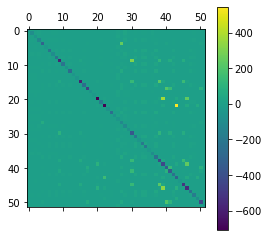

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
elasticities = result.compute_elasticities()
single_market = product_data['market_ids'] == '131-2014.0'
K=sum(single_market)
plt.colorbar(plt.matshow(elasticities[single_market][:,:K]))
# plt.colorbar(plt.matshow(elasticities))

Computing diversion ratios with respect to prices ...

Encountered a numerical error when computing a post-estimation output. Errors encountered: divide by zero.

Finished after 00:00:00.



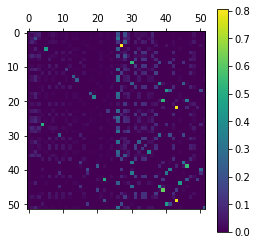

In [39]:
diversions = result.compute_diversion_ratios()
plt.colorbar(plt.matshow(diversions[single_market][:,:K]))